In [ ]:
import random
from collections import Counter
import matplotlib.pyplot as plt

class BVHNode:
    def __init__(self, level, max_level, num_children=4):
        self.level = level
        self.children = []
        if level < max_level:
            self.children = [BVHNode(level+1, max_level, num_children) for _ in range(num_children)]

    def is_leaf(self):
        return len(self.children) == 0

max_level = 3
root = BVHNode(0, max_level)

# Function to simulate BVH access pattern
def simulate_bvh_access(node, access_log=None):
    if access_log is None:
        access_log = []
    # Access parent if level is 0
    if node.level == 0:
        access_log.append(f"Accessed node at level {node.level}")
    # Access all children if not leaf
    for child in node.children:
        access_log.append(f"Accessed child at level {child.level}")
    # Randomly pick one child to traverse further
    if node.children:
        next_child = random.choice(node.children)
        simulate_bvh_access(next_child, access_log)
    return access_log

Accessed node at level 0
Accessed child at level 1
Accessed child at level 1
Accessed child at level 1
Accessed child at level 1
Accessed child at level 2
Accessed child at level 2
Accessed child at level 2
Accessed child at level 2
Accessed child at level 3
Accessed child at level 3
Accessed child at level 3
Accessed child at level 3


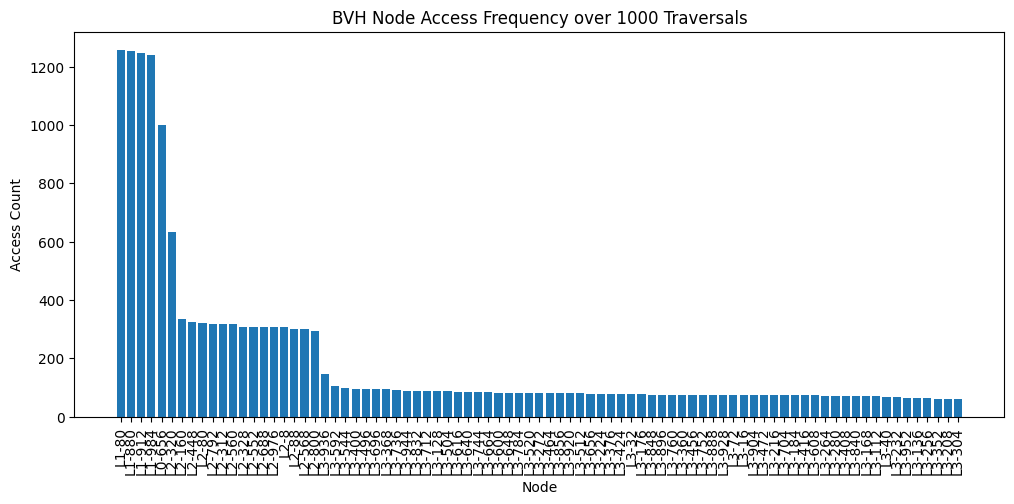

In [ ]:
num_trials = 1000
node_access_counter = Counter()

def simulate_bvh_access_count(node, node_ids=None):
    if node_ids is None:
        node_ids = []
    node_label = f"L{node.level}-{id(node)%1000}"
    node_ids.append(node_label)
    for child in node.children:
        node_ids.append(f"L{child.level}-{id(child)%1000}")
    if node.children:
        next_child = random.choice(node.children)
        simulate_bvh_access_count(next_child, node_ids)
    return node_ids

for _ in range(num_trials):
    ids = simulate_bvh_access_count(root)
    node_access_counter.update(ids)

plt.figure(figsize=(12,5))
nodes, counts = zip(*node_access_counter.most_common())
plt.bar(nodes, counts)
plt.xticks(rotation=90)
plt.xlabel('Node')
plt.ylabel('Access Count')
plt.title(f'BVH Node Access Frequency over {num_trials} Traversals')
plt.show()

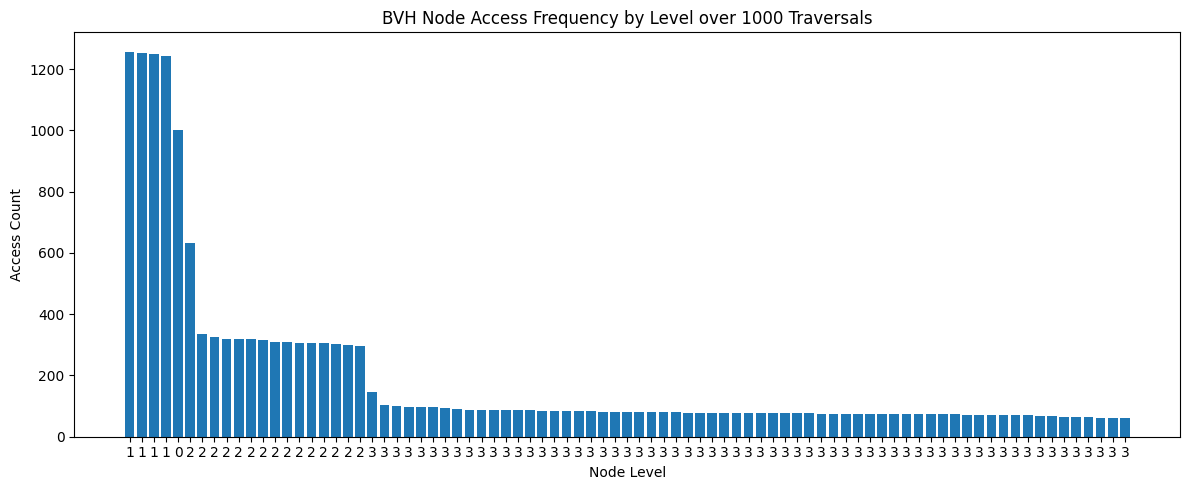

In [ ]:
plt.figure(figsize=(12,5))
nodes, counts = zip(*node_access_counter.most_common())
levels = [n.split('-')[0][1:] for n in nodes]  # Extract level from node label
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), levels, rotation=0)
plt.xlabel('Node Level')
plt.ylabel('Access Count')
plt.title(f'BVH Node Access Frequency by Level over {num_trials} Traversals')
plt.tight_layout()
plt.show()